# Final Project - Coronavirus (COVID-19) Pandemic Study

<p><img src="./coronavirus.png" alt="Project Image Record" width="600px"></p>

#### CORONAVIRUS DISEASE (COVID-19)
Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. This virus is transmitted by droplets and close contact.
The disease causes respiratory illness (like the flu) with symptoms such as a cough, fever, and in more severe cases, difficulty breathing. You can protect yourself by washing your hands frequently, avoiding touching your face, and avoiding close contact (1 meter or 3 feet) with people who are unwell and wearing a mask. Droplets play a very important role because when you speak, there are always droplets coming out of your mouth. Many people have asymptomatic or presymptomatic infections. If they are wearing face masks, it can prevent droplets that carry the virus from escaping and infecting others.

#### HOW DID THIS NEW CORONAVIRUS SPREAD TO HUMANS?

COVID-19 appeared in Wuhan, a city in China, in December 2019. Although health officials are still tracing the exact source of this new coronavirus, early hypotheses thought it may be linked to a seafood market in Wuhan, China. Some people who visited the market developed viral pneumonia caused by the new coronavirus. A study that came out on Jan. 25, 2020, notes that the individual with the first reported case became ill on Dec. 1, 2019, and had no link to the seafood market. Investigations are ongoing as to how this virus originated and spread.

#### WHAT IS THE INCUBATION PERIOD FOR COVID-19?

It appears that symptoms are showing up in people within 14 days of exposure to the virus.

#### WHAT ARE THE SYMPTOMS OF COVID-19?

* Cough
* Fever
* Shortness of breath

In rare cases, COVID-19 can lead to severe respiratory problems, kidney failure or death.

#### IF YOU FEEL SICK AND ARE CONCERNED YOU MIGHT HAVE COVID-19.
If you have a fever or any kind of respiratory difficulty such as coughing or shortness of breath, call your doctor or a health care provider and explain your symptoms over the phone before going to the doctor’s office, urgent care facility or emergency room.

https://www.hopkinsmedicine.org/health/conditions-and-diseases/coronavirus

#### HOW IT SPREADS
Coronavirus disease spreads primarily through contact with an infected person when they cough or sneeze. It also spreads when a person touches a surface or object that has the virus on it, then touches their eyes, nose, or mouth.
This virus is transmitted by droplets and close contact. Droplets play a very important role because when you speak, there are always droplets coming out of your mouth. Many people have asymptomatic or presymptomatic infections. If they are wearing face masks, it can prevent droplets that carry the virus from escaping and infecting others.



#### * There’s currently no vaccine to prevent coronavirus disease (COVID-19).

#### * You can protect yourself and help prevent spreading the virus to others if you:

DO:
Wash your hands regularly for 20 seconds, with soap and water or alcohol-based hand rub

Cover your nose and mouth with a disposable tissue or flexed elbow when you cough or sneeze

Avoid close contact (1 meter or 3 feet) with people who are unwell

Stay home and self-isolate from others in the household if you feel unwell

Wear face masks, it can prevent droplets that carry the virus from escaping and infecting others.

DON'T:
Touch your eyes, nose, or mouth if your hands are not clean

##### Source:  [John Hopkins University and Medicine](https://coronavirus.jhu.edu/map.html)

In [1]:
# import all neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context("paper")

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "seaborn"
from plotly.subplots import make_subplots

from pathlib import Path
import os

##### Let's start by importing the data

##### The update-to-date data from Kaggle [COVID-19 Complete Dataset (Updated every 24hrs)](https://www.kaggle.com/imdevskp/corona-virus-report) is used for this project.

In [2]:
# load data to dataframe
df = pd.read_csv("./corona-virus-report/covid_19_clean_complete.csv", parse_dates = ['Date'])
df.head()

Province/State Country/Region      Lat     Long       Date  Confirmed  \
0            NaN    Afghanistan  33.0000  65.0000 2020-01-22          0   
1            NaN        Albania  41.1533  20.1683 2020-01-22          0   
2            NaN        Algeria  28.0339   1.6596 2020-01-22          0   
3            NaN        Andorra  42.5063   1.5218 2020-01-22          0   
4            NaN         Angola -11.2027  17.8739 2020-01-22          0   

   Deaths  Recovered  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0

In [3]:
# look at the columns
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

## Details about the columns:

In [4]:
# examine dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16884 entries, 0 to 16883
Data columns (total 8 columns):
Province/State    5226 non-null object
Country/Region    16884 non-null object
Lat               16884 non-null float64
Long              16884 non-null float64
Date              16884 non-null datetime64[ns]
Confirmed         16884 non-null int64
Deaths            16884 non-null int64
Recovered         16884 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.0+ MB


##### There are 5 numerical columns ('Lat','Long','Confirmed','Deaths','Recovered') , 2 catagorical columns ('Province/State' & 'Country/Region' ) and 1 datetime column ('Date')

In [5]:
# look at some overall stats
df.describe(include = 'object')

Province/State Country/Region
count            5226          16884
unique             78            177
top         Chongqing          China
freq               67           2211

##### Going in detail, there are 177 unique countries and 78 unique province/states enlisted in the dataset

In [6]:
df.describe()

Lat          Long      Confirmed        Deaths     Recovered
count  16884.000000  16884.000000   16884.000000  16884.000000  16884.000000
mean      22.238772     23.356497     488.386283     18.975539    153.673182
std       24.364505     71.494673    4531.202523    247.439235   2208.252328
min      -41.454500   -135.000000       0.000000      0.000000      0.000000
25%        8.599125    -20.026050       0.000000      0.000000      0.000000
50%       23.914900     20.921188       0.000000      0.000000      0.000000
75%       41.316075     85.953175      24.000000      0.000000      1.000000
max       71.706900    178.065000  121478.000000  10023.000000  62098.000000

In [7]:
# look at the start and end date
a = df.Date.value_counts().sort_index()
print('The first date is:', a.index[0])
print('The last date is:', a.index[-1])

The first date is: 2020-01-22 00:00:00
The last date is: 2020-03-28 00:00:00


##### The dataset starts from 22nd January to 28th March 2020

In [8]:
# check missing data
df.isnull().sum()

Province/State    11658
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

##### Rename columns for more readable and add one more feature

In [9]:
#Renaming the coulmns for easy usage
df.rename(columns={'Date': 'date', 
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Lat':'lat', 'Long':'long',
                     'Confirmed': 'confirmed',
                     'Deaths':'deaths',
                     'Recovered':'recovered'
                    }, inplace=True)

# Active Case = confirmed - deaths - recovered
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']

In [10]:
df.head()

state      country      lat     long       date  confirmed  deaths  \
0   NaN  Afghanistan  33.0000  65.0000 2020-01-22          0       0   
1   NaN      Albania  41.1533  20.1683 2020-01-22          0       0   
2   NaN      Algeria  28.0339   1.6596 2020-01-22          0       0   
3   NaN      Andorra  42.5063   1.5218 2020-01-22          0       0   
4   NaN       Angola -11.2027  17.8739 2020-01-22          0       0   

   recovered  active  
0          0       0  
1          0       0  
2          0       0  
3          0       0  
4          0       0

# Visualization:

## Active cases around the world:

In [11]:
# get latest date data
top = df[df['date'] == df['date'].max()]

# sum total by each country
world = top.groupby('country')['confirmed','active','deaths'].sum().reset_index()
world

country  confirmed  active  deaths
0                         Afghanistan        110     104       4
1                             Albania        197     156      10
2                             Algeria        454     394      29
3                             Andorra        308     304       3
4                              Angola          5       5       0
5                 Antigua and Barbuda          7       7       0
6                           Argentina        690     600      18
7                             Armenia        407     376       1
8                           Australia       3640    3382      14
9                             Austria       8271    7978      68
10                         Azerbaijan        182     163       4
11                            Bahamas         10       9       0
12                            Bahrain        476     207       4
13                         Bangladesh         48      28       5
14                           Barbados         26      26       0
15                            Belarus         94      62       0
16                            Belgium       9134    7718     353
17                             Belize          2       2       0
18                              Benin          6       6       0
19                             Bhutan          3       3       0
20                            Bolivia         74      74       0
21             Bosnia and Herzegovina        258     248       5
22                             Brazil       3904    3787     111
23                             Brunei        120      94       1
24                           Bulgaria        331     313       7
25                       Burkina Faso        207     175      11
26                              Burma          8       8       0
27                         Cabo Verde          5       4       1
28                           Cambodia         99      86       0
29                           Cameroon         91      87       2
30                             Canada       5576    5515      61
31           Central African Republic          3       3       0
32                               Chad          3       3       0
33                              Chile       1909    1842       6
34                              China      81999    3600    3299
35                           Colombia        608     592       6
36                Congo (Brazzaville)          4       4       0
37                   Congo (Kinshasa)         65      57       6
38                         Costa Rica        295     290       2
39                      Cote d'Ivoire        101      98       0
40                            Croatia        657     607       5
41                               Cuba        119     112       3
42                             Cyprus        179     159       5
43                            Czechia       2631    2609      11
44                            Denmark       2366    2244      65
45                   Diamond Princess        712     105      10
46                           Djibouti         14      14       0
47                           Dominica         11      11       0
48                 Dominican Republic        719     688      28
49                            Ecuador       1823    1772      48
50                              Egypt        576     419      36
51                        El Salvador         19      19       0
52                  Equatorial Guinea         12      12       0
53                            Eritrea          6       6       0
54                            Estonia        645     624       1
55                           Eswatini          9       9       0
56                           Ethiopia         16      15       0
57                               Fiji          5       5       0
58                            Finland       1167    1148       9
59                             France      38105   30064    2317
60                              Gabon          7       6       1


### Making choropleth maps requires two main types of input:
##### <li>Geometry information:
* some identifying value in properties: Country names.
* one of the built-in geometries within plotly: US states and world countries

##### <li>A list of values indexed by feature identifier: 
* The data is passed into the color argument of <code>px.choropleth</code> in the same order as the IDs are passed into the location argument.

In [57]:
# visualize suing Plotly
figure = px.choropleth(world, locations="country", 
                    locationmode='country names', color="active", 
                    hover_name="country", range_color=[1,1000], 
                    color_continuous_scale="Peach", 
                    #title='Countries with Active Cases')
                    title='MAP OF ACTIVE CASES BY COUNTRY')
figure.show()

#### Here are my observations :
##### 1) Most of the countries have crossed the 10000 barriers, while some of them can control the spread of the virus and have kept it under 1000.
##### 2) China is one of the only nations which has been decreasing the active number of cases
##### 3) But in some other nations like the US, Italy, Spain, France, the number of active cases is rising rapidly.

## Death count around the world:

In [13]:
# visualize death toll using scatter on geographic map
world['size'] = world['deaths'].pow(0.2)
fig = px.scatter_geo(world, locations="country",locationmode='country names', color="deaths",
                     hover_name="country", size="size",
                     projection="natural earth",title='Death count of each country')
fig.show()

## Confirmed Cases Over Time

[Text(0, 0.5, 'Total cases'), Text(0.5, 0, 'Dates')]

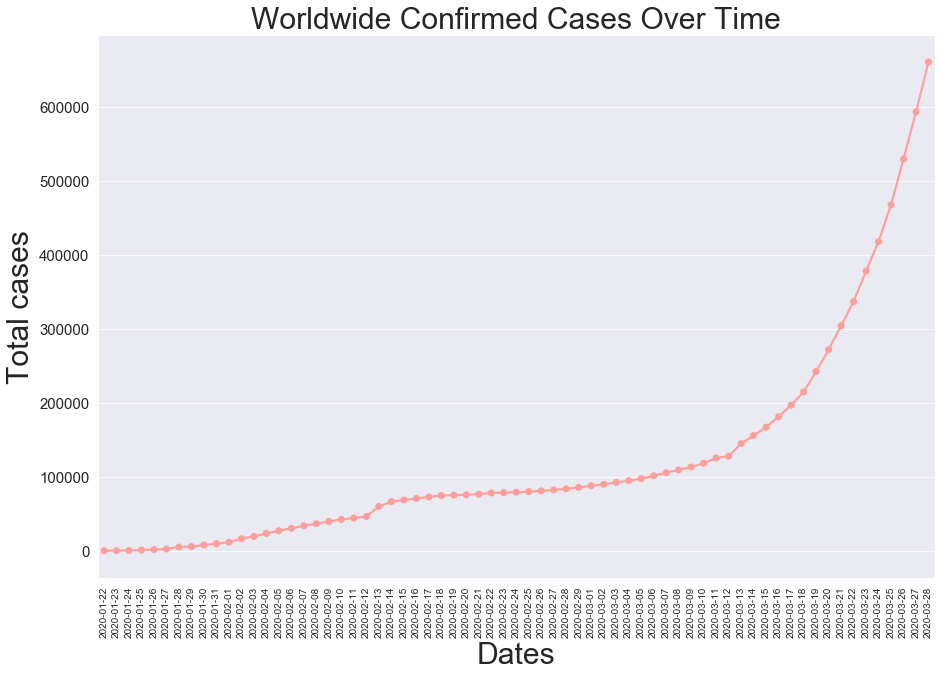

In [14]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel("Dates",fontsize = 30)
plt.ylabel('Total cases',fontsize = 30)
plt.title("Worldwide Confirmed Cases Over Time" , fontsize = 30)
total_cases = df.groupby('date')['date', 'confirmed'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])


ax = sns.pointplot( x = total_cases.date.dt.date ,y = total_cases.confirmed , color = 'r')
ax.set(xlabel='Dates', ylabel='Total cases')

#### Here are my observations :
##### 1) The slope of the line, in the beginning, was gradually ascending and at recent times, it's very high!
##### 2) At the current rate, there are no signs of a drop in the total cases.
##### 3) If protective measures are not taken, there's no wonder the slope reaches to max

## Top 20 countries having most confirmed cases

In [15]:
# group by country to sum and sort to get the top country list
top = df[df['date'] == df['date'].max()]
top_casualities = top.groupby(by = 'country')['confirmed'].sum().sort_values(ascending = False).head(20).reset_index()
top_casualities

country  confirmed
0               US     121478
1            Italy      92472
2            China      81999
3            Spain      73235
4          Germany      57695
5           France      38105
6             Iran      35408
7   United Kingdom      17312
8      Switzerland      14076
9      Netherlands       9819
10     South Korea       9478
11         Belgium       9134
12         Austria       8271
13          Turkey       7402
14          Canada       5576
15        Portugal       5170
16          Norway       4015
17          Brazil       3904
18       Australia       3640
19          Israel       3619

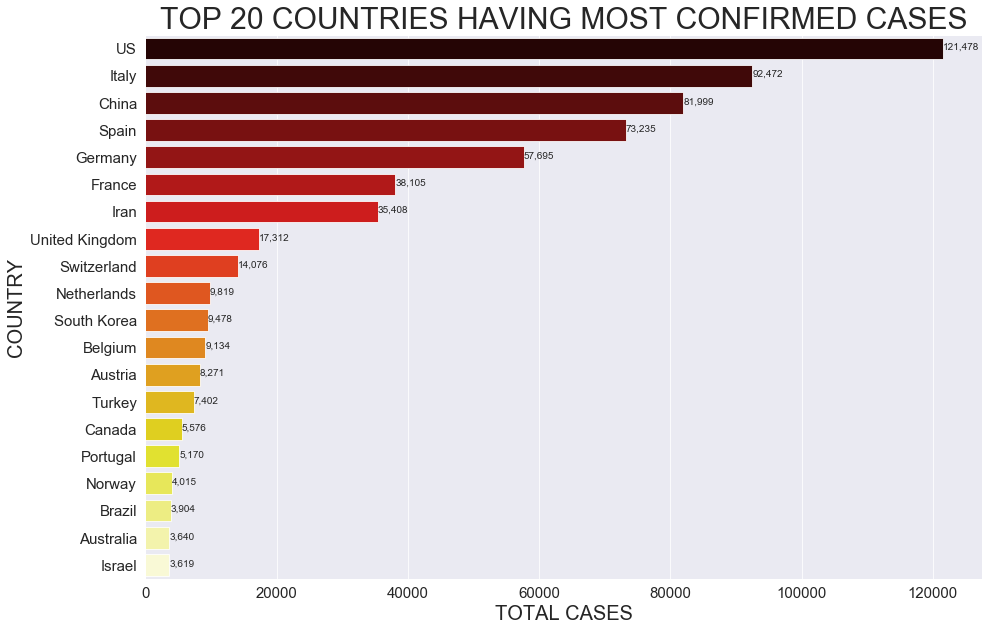

In [75]:
# viualize it
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("TOTAL CASES",fontsize = 20)
plt.ylabel('COUNTRY',fontsize = 20)
plt.title("TOP 20 COUNTRIES HAVING MOST CONFIRMED CASES" , fontsize = 30)
ax = sns.barplot(x = top_casualities.confirmed, y = top_casualities.country, palette="hot")
for i, (value, name) in enumerate(zip(top_casualities.confirmed,top_casualities.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='TOTAL CASES', ylabel='COUNTRY');

#### Here are my observations :
##### 1) China was leading this from many days, but now they can control the pandemic spread.
##### 2) The number of confirmed cases are on a high in the US, Italy, Spain, and France.
##### 3) But the number of cases in the third world countries is quite less.

## C. Top 20 countries having most active cases

In [17]:
top_actives = top.groupby(by = 'country')['active'].sum().sort_values(ascending = False).head(20).reset_index()
top_actives

country  active
0               US  118380
1            Italy   70065
2            Spain   54968
3          Germany   48781
4           France   30064
5             Iran   21212
6   United Kingdom   16140
7      Switzerland   12282
8      Netherlands    9173
9          Austria    7978
10         Belgium    7718
11          Turkey    7224
12          Canada    5515
13        Portugal    5027
14     South Korea    4523
15          Norway    3985
16          Brazil    3787
17           China    3600
18          Israel    3518
19       Australia    3382

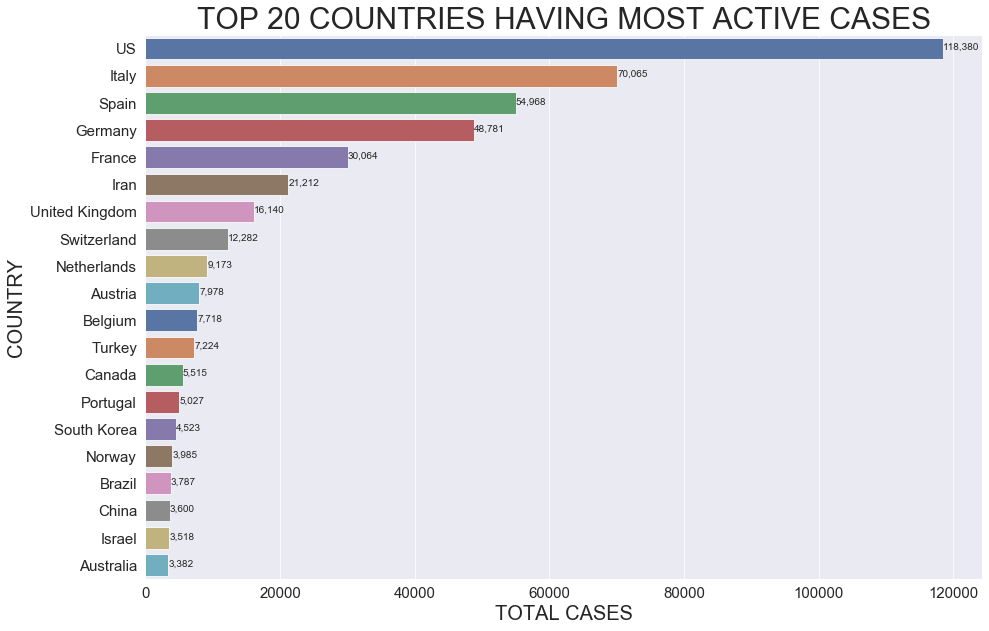

In [73]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("TOTAL CASES",fontsize = 20)
plt.ylabel('COUNTRY',fontsize = 20)
plt.title("TOP 20 COUNTRIES HAVING MOST ACTIVE CASES" , fontsize = 30)
ax = sns.barplot(x = top_actives.active, y = top_actives.country, palette="deep")
for i, (value, name) in enumerate(zip(top_actives.active, top_actives.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='TOTAL CASES', ylabel='COUNTRY');

#### Here are my observations :
##### 1) As the covid-19 testing is increasing, the number of active cases is also increasing day by day.
##### 2) The number of active cases is on a high in the US, Italy, Spain, and France.
##### 3) In comparison with the total population, Italy, Spain and France are the worst-hit nation. 

## D. Top 20 countries having most deaths

In [19]:
top_deaths = top.groupby(by = 'country')['deaths'].sum().sort_values(ascending = False).head(20).reset_index()
top_deaths

country  deaths
0            Italy   10023
1            Spain    5982
2            China    3299
3             Iran    2517
4           France    2317
5               US    2026
6   United Kingdom    1021
7      Netherlands     640
8          Germany     433
9          Belgium     353
10     Switzerland     264
11     South Korea     144
12          Brazil     111
13          Turkey     108
14          Sweden     105
15       Indonesia     102
16        Portugal     100
17         Austria      68
18     Philippines      68
19         Denmark      65

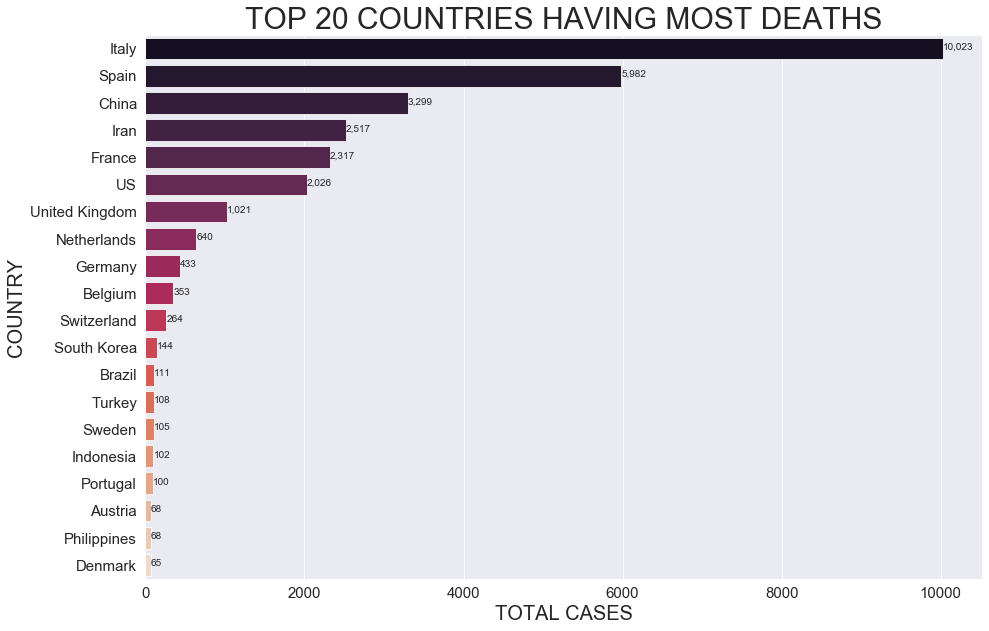

In [72]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("TOTAL CASES",fontsize = 20)
plt.ylabel('COUNTRY',fontsize = 20)
plt.title("TOP 20 COUNTRIES HAVING MOST DEATHS" , fontsize = 30)
ax = sns.barplot(x = top_deaths.deaths, y = top_deaths.country, palette="rocket")
for i, (value, name) in enumerate(zip(top_deaths.deaths,top_deaths.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='TOTAL CASES', ylabel='COUNTRY');

#### Here are my observations :
##### 1) Even though Italy has the 2nd best healthcare system according to the WHO, they haven't been able to tackle the pandemic problem effectively.
##### 2) China even having so many confirmed cases was able to decrease the number of deaths
##### 3) The number of deaths is also on a rise, especially in Italy, Spain, and Iran.

## E. Top 20 countries having most recovered cases

In [21]:
top_recovered = top.groupby(by = 'country')['recovered'].sum().sort_values(ascending = False).head(20).reset_index()
top_recovered

country  recovered
0              China      75100
1              Italy      12384
2              Spain      12285
3               Iran      11679
4            Germany       8481
5             France       5724
6        South Korea       4811
7        Switzerland       1530
8                 US       1072
9            Belgium       1063
10  Diamond Princess        597
11             Japan        404
12          Malaysia        320
13           Bahrain        265
14         Australia        244
15           Austria        225
16         Singapore        198
17    United Kingdom        151
18           Romania        139
19              Iraq        131

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

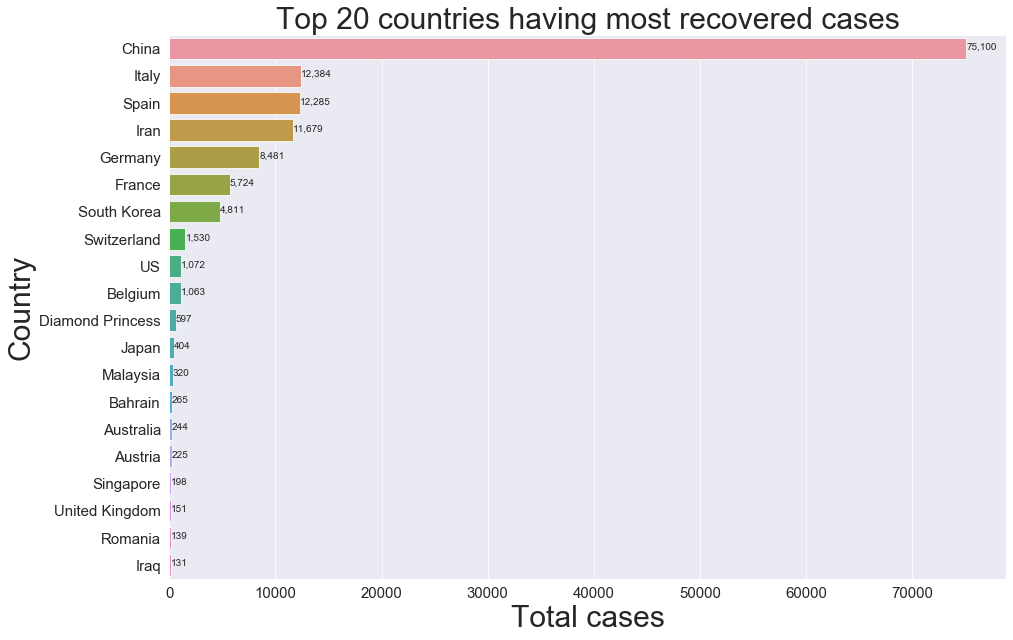

In [22]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most recovered cases" , fontsize = 30)
ax = sns.barplot(x = top_recovered.recovered, y = top_recovered.country)
for i, (value, name) in enumerate(zip(top_recovered.recovered,top_recovered.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

#### Here are my observations :
##### 1) By far China is leading in the number of recoveries even though having a huge number of confirmed cases
##### 2) Italy, Iran, and Spain are also doing a good job.
##### 3) We have to pump up these numbers for a promising future!

## F. Top 20 countries having the worst mortality and best recovery rate:

In [23]:
rate = top.groupby(by = 'country')['recovered','confirmed','deaths'].sum().reset_index()
rate['recovery percentage'] =  round(((rate['recovered']) / (rate['confirmed'])) * 100 , 2)
rate['death percentage'] =  round(((rate['deaths']) / (rate['confirmed'])) * 100 , 2)
rate

country  recovered  confirmed  deaths  \
0                         Afghanistan          2        110       4   
1                             Albania         31        197      10   
2                             Algeria         31        454      29   
3                             Andorra          1        308       3   
4                              Angola          0          5       0   
5                 Antigua and Barbuda          0          7       0   
6                           Argentina         72        690      18   
7                             Armenia         30        407       1   
8                           Australia        244       3640      14   
9                             Austria        225       8271      68   
10                         Azerbaijan         15        182       4   
11                            Bahamas          1         10       0   
12                            Bahrain        265        476       4   
13                         Bangladesh         15         48       5   
14                           Barbados          0         26       0   
15                            Belarus         32         94       0   
16                            Belgium       1063       9134     353   
17                             Belize          0          2       0   
18                              Benin          0          6       0   
19                             Bhutan          0          3       0   
20                            Bolivia          0         74       0   
21             Bosnia and Herzegovina          5        258       5   
22                             Brazil          6       3904     111   
23                             Brunei         25        120       1   
24                           Bulgaria         11        331       7   
25                       Burkina Faso         21        207      11   
26                              Burma          0          8       0   
27                         Cabo Verde          0          5       1   
28                           Cambodia         13         99       0   
29                           Cameroon          2         91       2   
30                             Canada          0       5576      61   
31           Central African Republic          0          3       0   
32                               Chad          0          3       0   
33                              Chile         61       1909       6   
34                              China      75100      81999    3299   
35                           Colombia         10        608       6   
36                Congo (Brazzaville)          0          4       0   
37                   Congo (Kinshasa)          2         65       6   
38                         Costa Rica          3        295       2   
39                      Cote d'Ivoire          3        101       0   
40                            Croatia         45        657       5   
41                               Cuba          4        119       3   
42                             Cyprus         15        179       5   
43                            Czechia         11       2631      11   
44                            Denmark         57       2366      65   
45                   Diamond Princess        597        712      10   
46                           Djibouti          0         14       0   
47                           Dominica          0         11       0   
48                 Dominican Republic          3        719      28   
49                            Ecuador          3       1823      48   
50                              Egypt        121        576      36   
51                        El Salvador          0         19       0   
52                  Equatorial Guinea          0         12       0   
53                            Eritrea          0          6       0   
54                            Estonia         20        645       1   
55                           Eswatini          0      

In [24]:
mortality = rate.groupby(by = 'country')['death percentage'].sum().sort_values(ascending = False).head(23).reset_index()
mortality

country  death percentage
0             Gambia             33.33
1          Nicaragua             25.00
2         Cabo Verde             20.00
3              Sudan             20.00
4              Gabon             14.29
5           Zimbabwe             14.29
6             Guyana             12.50
7              Italy             10.84
8         Bangladesh             10.42
9              Niger             10.00
10        San Marino              9.82
11  Congo (Kinshasa)              9.23
12         Indonesia              8.83
13              Iraq              8.30
14             Spain              8.17
15              Iran              7.11
16       Netherlands              6.52
17           Algeria              6.39
18       Philippines              6.33
19             Egypt              6.25
20           Morocco              6.22
21            France              6.08
22    United Kingdom              5.90

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Mortality Rate in percentage')]

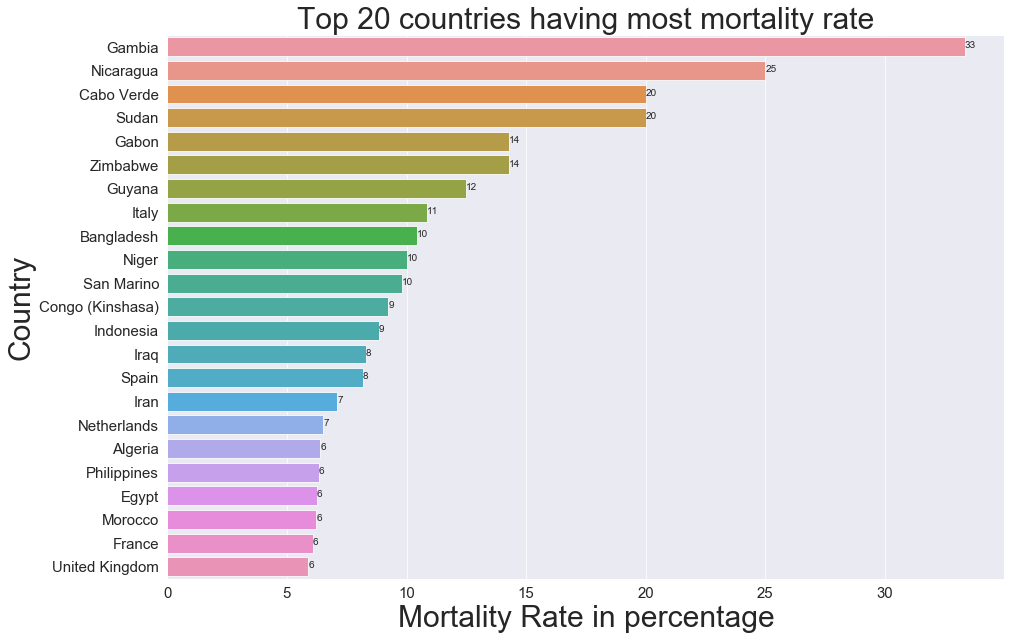

In [25]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most mortality rate" , fontsize = 30)
ax = sns.barplot(x = mortality['death percentage'], y = mortality.country)
for i, (value, name) in enumerate(zip(mortality['death percentage'], mortality.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Mortality Rate in percentage', ylabel='Country')

##### Here are my observations:
##### 1) Zimbabwe, Sudan and the Gambia have the highest mortality rate because there is very less number of the confirmed cases, yet there more deaths in them.
##### 2) The majority of the countries which top the list have a bad healthcare system and they require help from developed countries.
##### 3) But when a minimum of 100 confirmed cases is considered, San Marino, Iraq and Indonesia top the charts
##### 4) When more than 10000 confirmed cases are considered, Italy is at the top and this percentage rate is very scary. It seems that they have lost control over the spread of covid-19 and cannot contain it.

In [26]:
recovery = rate.groupby(by = 'country')['recovery percentage'].sum().sort_values(ascending = False).head(20).reset_index()
recovery

country  recovery percentage
0   Saint Vincent and the Grenadines               100.00
1                              China                91.59
2                   Diamond Princess                83.85
3                           Maldives                56.25
4                            Bahrain                55.67
5                        South Korea                50.76
6                            Belarus                34.04
7                        Saint Lucia                33.33
8                               Iran                32.98
9                          Venezuela                32.77
10                        Bangladesh                31.25
11                         Guatemala                29.41
12                            Kuwait                27.23
13                              Iraq                25.89
14                           Namibia                25.00
15                         Singapore                24.69
16                             Japan                23.86
17                             Egypt                21.01
18                            Brunei                20.83
19                             Nepal                20.00

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Recovery Rate in percentage')]

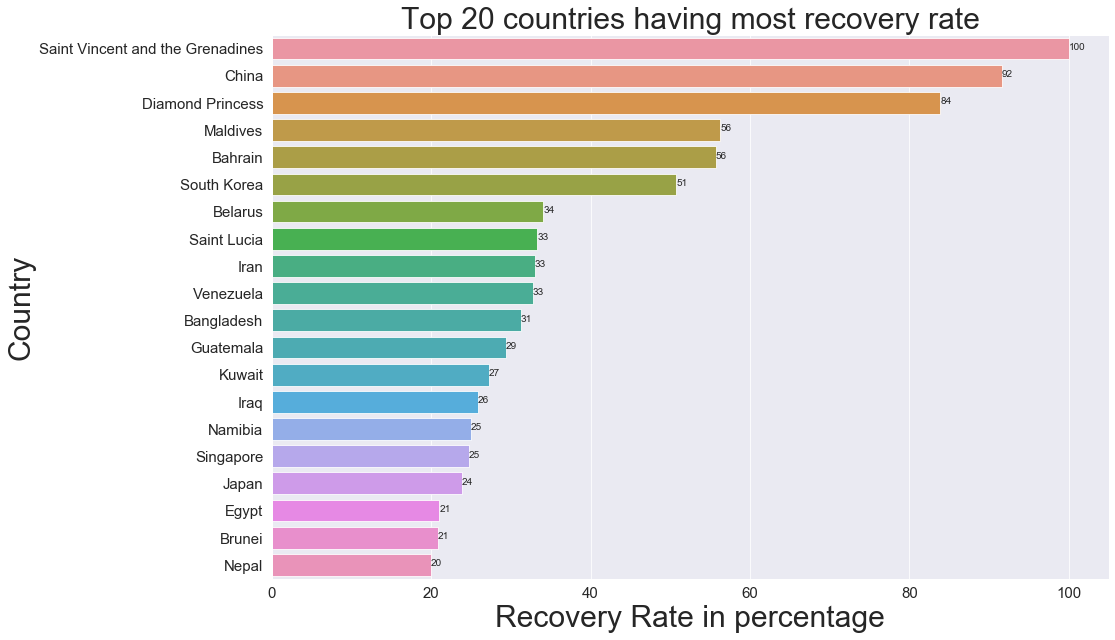

In [27]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most recovery rate" , fontsize = 30)
ax = sns.barplot(x = recovery['recovery percentage'], y = recovery.country)
for i, (value, name) in enumerate(zip(recovery['recovery percentage'], recovery.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Recovery Rate in percentage', ylabel='Country')

##### Here are my observations:
##### 1) China tops the chart and they are doing a remarkable job with a recovery rate of 90%. It tells us that in every 100 infected people, 90 people have recovered from the covid-19 virus.
##### 2) The Cruise ship is unusual here as the outbreak was a while ago and it explains the high recovery rate.
##### 3) South Korea, Bahrain and Iran are also doing a fantastic job treating the covid-19 virus.
##### 4) Surprisingly the Maldives have recovered 8 out of their 13 confirmed cases.

# 3. Analysis of most affected countries

##### I will select the most affected countries for further analysis and visualization i.e China, US, Italy.
##### I will also select India so that I can analyze and foresee the covid - 19 problem of our country.
##### The analysis and visualizations of the covid cases in each country will start from the day of their first covid-19 case. From this, we can get valuable insights like the rate of growth of the covid-19 virus.

##### The first case of China recorded in this dataset is 22nd January,2020 . So let's consider it as day 1 and make the required changes in the dataset.

In [28]:
china =  df[df.country == 'China']
china = china.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
china

date  recovered  deaths  confirmed  active
0  2020-01-22         28      17        548     503
1  2020-01-23         30      18        643     595
2  2020-01-24         36      26        920     858
3  2020-01-25         39      42       1406    1325
4  2020-01-26         49      56       2075    1970
5  2020-01-27         58      82       2877    2737
6  2020-01-28        101     131       5509    5277
7  2020-01-29        120     133       6087    5834
8  2020-01-30        135     171       8141    7835
9  2020-01-31        214     213       9802    9375
10 2020-02-01        275     259      11891   11357
11 2020-02-02        463     361      16630   15806
12 2020-02-03        614     425      19716   18677
13 2020-02-04        843     491      23707   22373
14 2020-02-05       1115     563      27440   25762
15 2020-02-06       1477     633      30587   28477
16 2020-02-07       1999     718      34110   31393
17 2020-02-08       2596     805      36814   33413
18 2020-02-09       3219     905      39829   35705
19 2020-02-10       3918    1012      42354   37424
20 2020-02-11       4636    1112      44386   38638
21 2020-02-12       5082    1117      46267   40068
22 2020-02-13       6217    1369      59895   52309
23 2020-02-14       7977    1521      66358   56860
24 2020-02-15       9298    1663      68413   57452
25 2020-02-16      10755    1766      70513   57992
26 2020-02-17      12462    1864      72434   58108
27 2020-02-18      14206    2003      74211   58002
28 2020-02-19      15962    2116      74619   56541
29 2020-02-20      18014    2238      75077   54825
30 2020-02-21      18704    2238      75550   54608
31 2020-02-22      22699    2443      77001   51859
32 2020-02-23      23187    2445      77022   51390
33 2020-02-24      25015    2595      77241   49631
34 2020-02-25      27676    2665      77754   47413
35 2020-02-26      30084    2717      78166   45365
36 2020-02-27      32930    2746      78600   42924
37 2020-02-28      36329    2790      78928   39809
38 2020-02-29      39320    2837      79356   37199
39 2020-03-01      42162    2872      79932   34898
40 2020-03-02      44854    2914      80136   32368
41 2020-03-03      47450    2947      80261   29864
42 2020-03-04      50001    2983      80386   27402
43 2020-03-05      52292    3015      80537   25230
44 2020-03-06      53944    3044      80690   23702
45 2020-03-07      55539    3072      80770   22159
46 2020-03-08      57388    3100      80823   20335
47 2020-03-09      58804    3123      80860   18933
48 2020-03-10      60181    3139      80887   17567
49 2020-03-11      61644    3161      80921   16116
50 2020-03-12      62901    3172      80932   14859
51 2020-03-13      64196    3180      80945   13569
52 2020-03-14      65660    3193      80977   12124
53 2020-03-15      67017    3203      81003   10783
54 2020-03-16      67910    3217      81033    9906
55 2020-03-17      68798    3230      81058    9030
56 2020-03-18      69755    3241      81102    8106
57 2020-03-19      70535    3249      81156    7372
58 2020-03-20      71266    3253      81250    6731
59 2020-03-21      71857    3259      81305    6189
60 2020-03-22      72362    3274      81435    5799
61 2020-03-23      72814    3274      81498    5410
62 2020-03-24      73280    3281      81591    5030
63 2020-03-25      73773    3285      81661    4603
64 2020-03-26      74181    3291      81782    4310
65 2020-03-27      74720    3296      81897    3881
66 2020-03-28      75100    3299      81999    3600

##### The first case recorded in US is on 24th February,2020. So let's consider it as day 1 and make the required changes in the dataset

In [29]:
us =  df[df.country == 'US']
us = us.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
us = us.iloc[33:].reset_index().drop('index', axis = 1)
us

date  recovered  deaths  confirmed  active
0  2020-02-24          5       0         51      46
1  2020-02-25          6       0         51      45
2  2020-02-26          6       0         57      51
3  2020-02-27          6       0         58      52
4  2020-02-28          7       0         60      53
5  2020-02-29          7       1         68      60
6  2020-03-01          7       1         74      66
7  2020-03-02          7       6         98      85
8  2020-03-03          7       7        118     104
9  2020-03-04          7      11        149     131
10 2020-03-05          7      12        217     198
11 2020-03-06          7      14        262     241
12 2020-03-07          7      17        402     378
13 2020-03-08          7      21        518     490
14 2020-03-09          7      22        583     554
15 2020-03-10          8      28        959     923
16 2020-03-11          8      36       1281    1237
17 2020-03-12         12      40       1663    1611
18 2020-03-13         12      47       2179    2120
19 2020-03-14         12      54       2727    2661
20 2020-03-15         12      63       3499    3424
21 2020-03-16         17      85       4632    4530
22 2020-03-17         17     108       6421    6296
23 2020-03-18        105     118       7783    7560
24 2020-03-19        121     200      13677   13356
25 2020-03-20        147     244      19100   18709
26 2020-03-21        176     307      25489   25006
27 2020-03-22        178     417      33276   32681
28 2020-03-23        178     557      43847   43112
29 2020-03-24        348     706      53740   52686
30 2020-03-25        361     942      65778   64475
31 2020-03-26        681    1209      83836   81946
32 2020-03-27        869    1581     101657   99207
33 2020-03-28       1072    2026     121478  118380

##### The first case recorded in Italy is on 31st January. So let's consider it as day 1 and make the required changes in the dataset.

In [30]:
italy =  df[df.country == 'Italy']
italy = italy.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
italy = italy.iloc[9:].reset_index().drop('index', axis = 1)
italy

date  recovered  deaths  confirmed  active
0  2020-01-31          0       0          2       2
1  2020-02-01          0       0          2       2
2  2020-02-02          0       0          2       2
3  2020-02-03          0       0          2       2
4  2020-02-04          0       0          2       2
5  2020-02-05          0       0          2       2
6  2020-02-06          0       0          2       2
7  2020-02-07          0       0          3       3
8  2020-02-08          0       0          3       3
9  2020-02-09          0       0          3       3
10 2020-02-10          0       0          3       3
11 2020-02-11          0       0          3       3
12 2020-02-12          0       0          3       3
13 2020-02-13          0       0          3       3
14 2020-02-14          0       0          3       3
15 2020-02-15          0       0          3       3
16 2020-02-16          0       0          3       3
17 2020-02-17          0       0          3       3
18 2020-02-18          0       0          3       3
19 2020-02-19          0       0          3       3
20 2020-02-20          0       0          3       3
21 2020-02-21          0       1         20      19
22 2020-02-22          1       2         62      59
23 2020-02-23          2       3        155     150
24 2020-02-24          1       7        229     221
25 2020-02-25          1      10        322     311
26 2020-02-26          3      12        453     438
27 2020-02-27         45      17        655     593
28 2020-02-28         46      21        888     821
29 2020-02-29         46      29       1128    1053
30 2020-03-01         83      34       1694    1577
31 2020-03-02        149      52       2036    1835
32 2020-03-03        160      79       2502    2263
33 2020-03-04        276     107       3089    2706
34 2020-03-05        414     148       3858    3296
35 2020-03-06        523     197       4636    3916
36 2020-03-07        589     233       5883    5061
37 2020-03-08        622     366       7375    6387
38 2020-03-09        724     463       9172    7985
39 2020-03-10        724     631      10149    8794
40 2020-03-11       1045     827      12462   10590
41 2020-03-12       1045     827      12462   10590
42 2020-03-13       1439    1266      17660   14955
43 2020-03-14       1966    1441      21157   17750
44 2020-03-15       2335    1809      24747   20603
45 2020-03-16       2749    2158      27980   23073
46 2020-03-17       2941    2503      31506   26062
47 2020-03-18       4025    2978      35713   28710
48 2020-03-19       4440    3405      41035   33190
49 2020-03-20       4440    4032      47021   38549
50 2020-03-21       6072    4825      53578   42681
51 2020-03-22       7024    5476      59138   46638
52 2020-03-23       7024    6077      63927   50826
53 2020-03-24       8326    6820      69176   54030
54 2020-03-25       9362    7503      74386   57521
55 2020-03-26      10361    8215      80589   62013
56 2020-03-27      10950    9134      86498   66414
57 2020-03-28      12384   10023      92472   70065

##### The first case recorded in India is on 30th January. So let's consider it as day 1 and make the required changes in the dataset.

In [31]:
india =  df[df.country == 'India']
india = india.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
india = india.iloc[8:].reset_index().drop('index', axis = 1)
india

date  recovered  deaths  confirmed  active
0  2020-01-30          0       0          1       1
1  2020-01-31          0       0          1       1
2  2020-02-01          0       0          1       1
3  2020-02-02          0       0          2       2
4  2020-02-03          0       0          3       3
5  2020-02-04          0       0          3       3
6  2020-02-05          0       0          3       3
7  2020-02-06          0       0          3       3
8  2020-02-07          0       0          3       3
9  2020-02-08          0       0          3       3
10 2020-02-09          0       0          3       3
11 2020-02-10          0       0          3       3
12 2020-02-11          0       0          3       3
13 2020-02-12          0       0          3       3
14 2020-02-13          0       0          3       3
15 2020-02-14          0       0          3       3
16 2020-02-15          0       0          3       3
17 2020-02-16          3       0          3       0
18 2020-02-17          3       0          3       0
19 2020-02-18          3       0          3       0
20 2020-02-19          3       0          3       0
21 2020-02-20          3       0          3       0
22 2020-02-21          3       0          3       0
23 2020-02-22          3       0          3       0
24 2020-02-23          3       0          3       0
25 2020-02-24          3       0          3       0
26 2020-02-25          3       0          3       0
27 2020-02-26          3       0          3       0
28 2020-02-27          3       0          3       0
29 2020-02-28          3       0          3       0
30 2020-02-29          3       0          3       0
31 2020-03-01          3       0          3       0
32 2020-03-02          3       0          5       2
33 2020-03-03          3       0          5       2
34 2020-03-04          3       0         28      25
35 2020-03-05          3       0         30      27
36 2020-03-06          3       0         31      28
37 2020-03-07          3       0         34      31
38 2020-03-08          3       0         39      36
39 2020-03-09          3       0         43      40
40 2020-03-10          4       0         56      52
41 2020-03-11          4       1         62      57
42 2020-03-12          4       1         73      68
43 2020-03-13          4       2         82      76
44 2020-03-14          4       2        102      96
45 2020-03-15         13       2        113      98
46 2020-03-16         13       2        119     104
47 2020-03-17         14       3        142     125
48 2020-03-18         14       3        156     139
49 2020-03-19         15       4        194     175
50 2020-03-20         20       5        244     219
51 2020-03-21         23       4        330     303
52 2020-03-22         27       7        396     362
53 2020-03-23         27      10        499     462
54 2020-03-24         40      10        536     486
55 2020-03-25         43      12        657     602
56 2020-03-26         45      20        727     662
57 2020-03-27         73      20        887     794
58 2020-03-28         84      24        987     879

## Comparision on no. of confirmed cases till date:

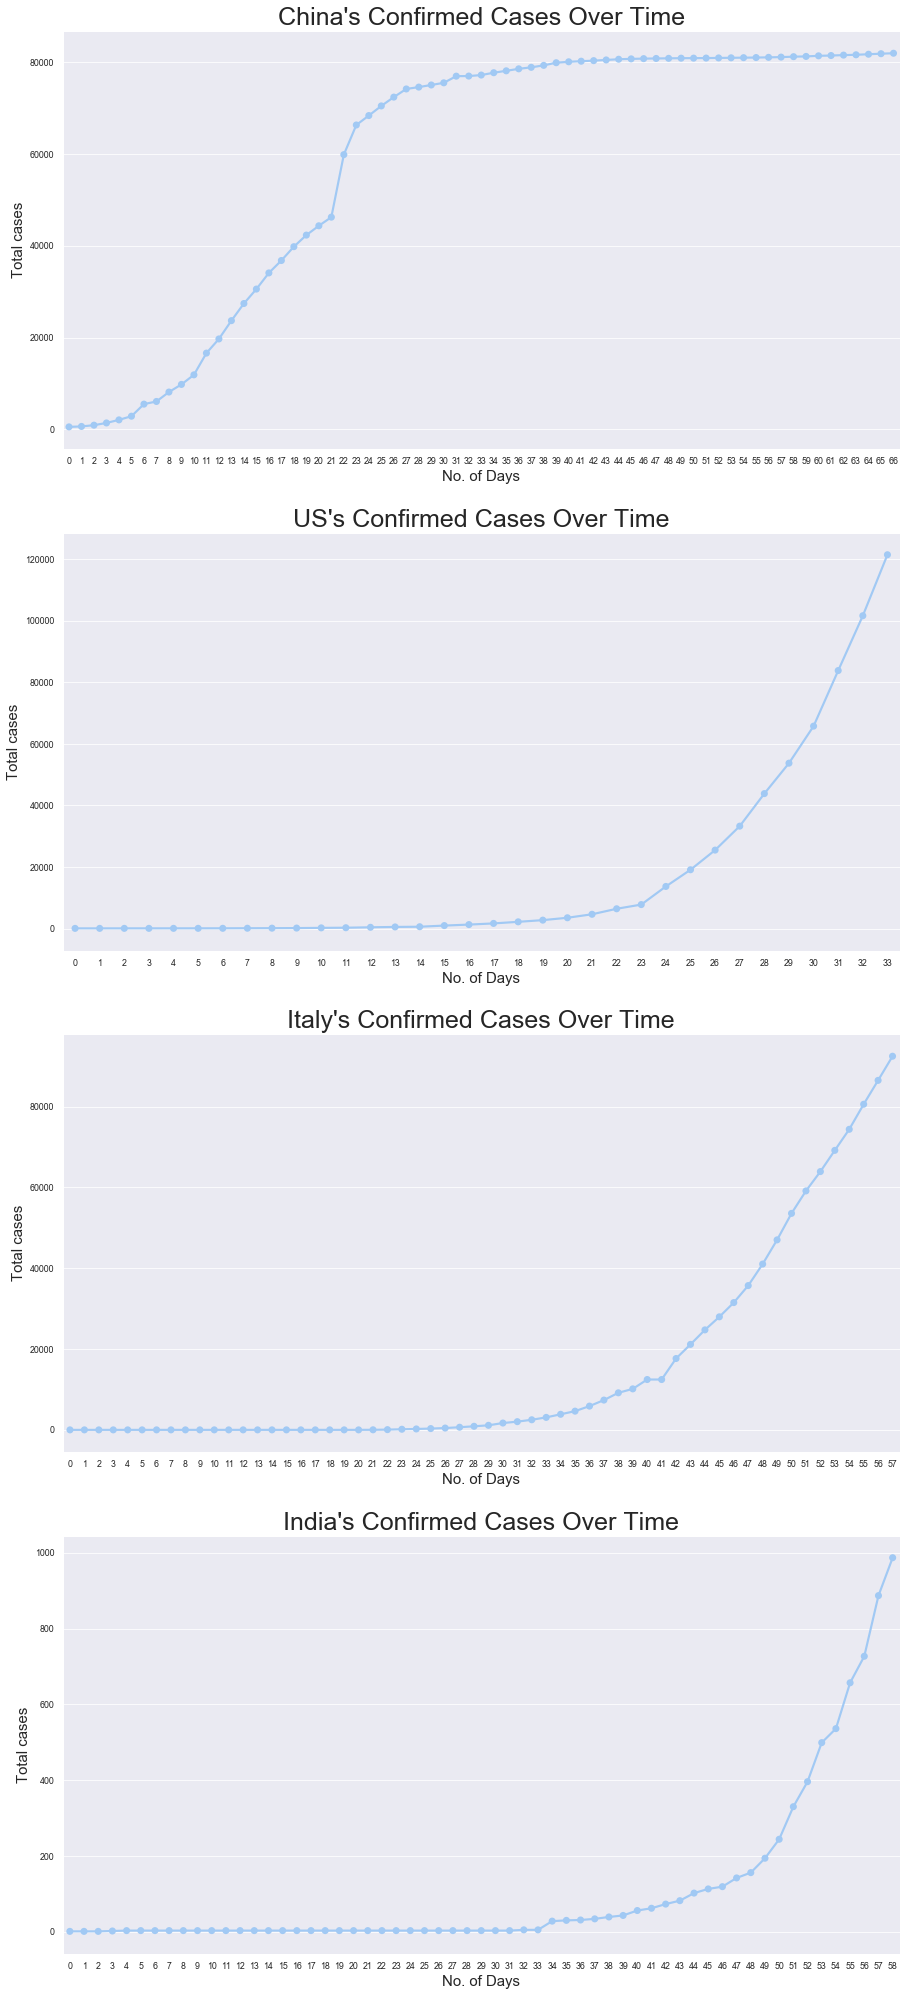

In [32]:
plt.figure(figsize=(15,30))
a = plt.subplot(4, 1, 1)
sns.pointplot(china.index ,china.confirmed)
plt.title("China's Confirmed Cases Over Time" , fontsize = 25)
plt.ylabel('Total cases', fontsize = 15)
plt.xlabel('No. of Days', fontsize = 15)

plt.subplot(4, 1, 2)
sns.pointplot(us.index ,us.confirmed)
plt.title("US's Confirmed Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 3)
sns.pointplot(italy.index ,italy.confirmed)
plt.title("Italy's Confirmed Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 4)
sns.pointplot(india.index ,india.confirmed)
plt.title("India's Confirmed Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplots_adjust(bottom=0.01, top=0.9)

##### Here are my observations:
##### 1) From Day 0 to Day 15, China has very a high slope as the covid-19 originated there. Whereas in other countries, the slope is quite low.
##### 2) After day 15, there was an incremental rise in the number of cases in the US, whereas in Italy and India it is still less.
##### 3) But after that, there is a high surge in no. of cases in US and Italy
##### 4) India seems to be doing a great job in controlling the spread of the virus and keep the count of cases less. But lately, there has been a rise in the number of cases!

## Comparision on no. of active cases now:

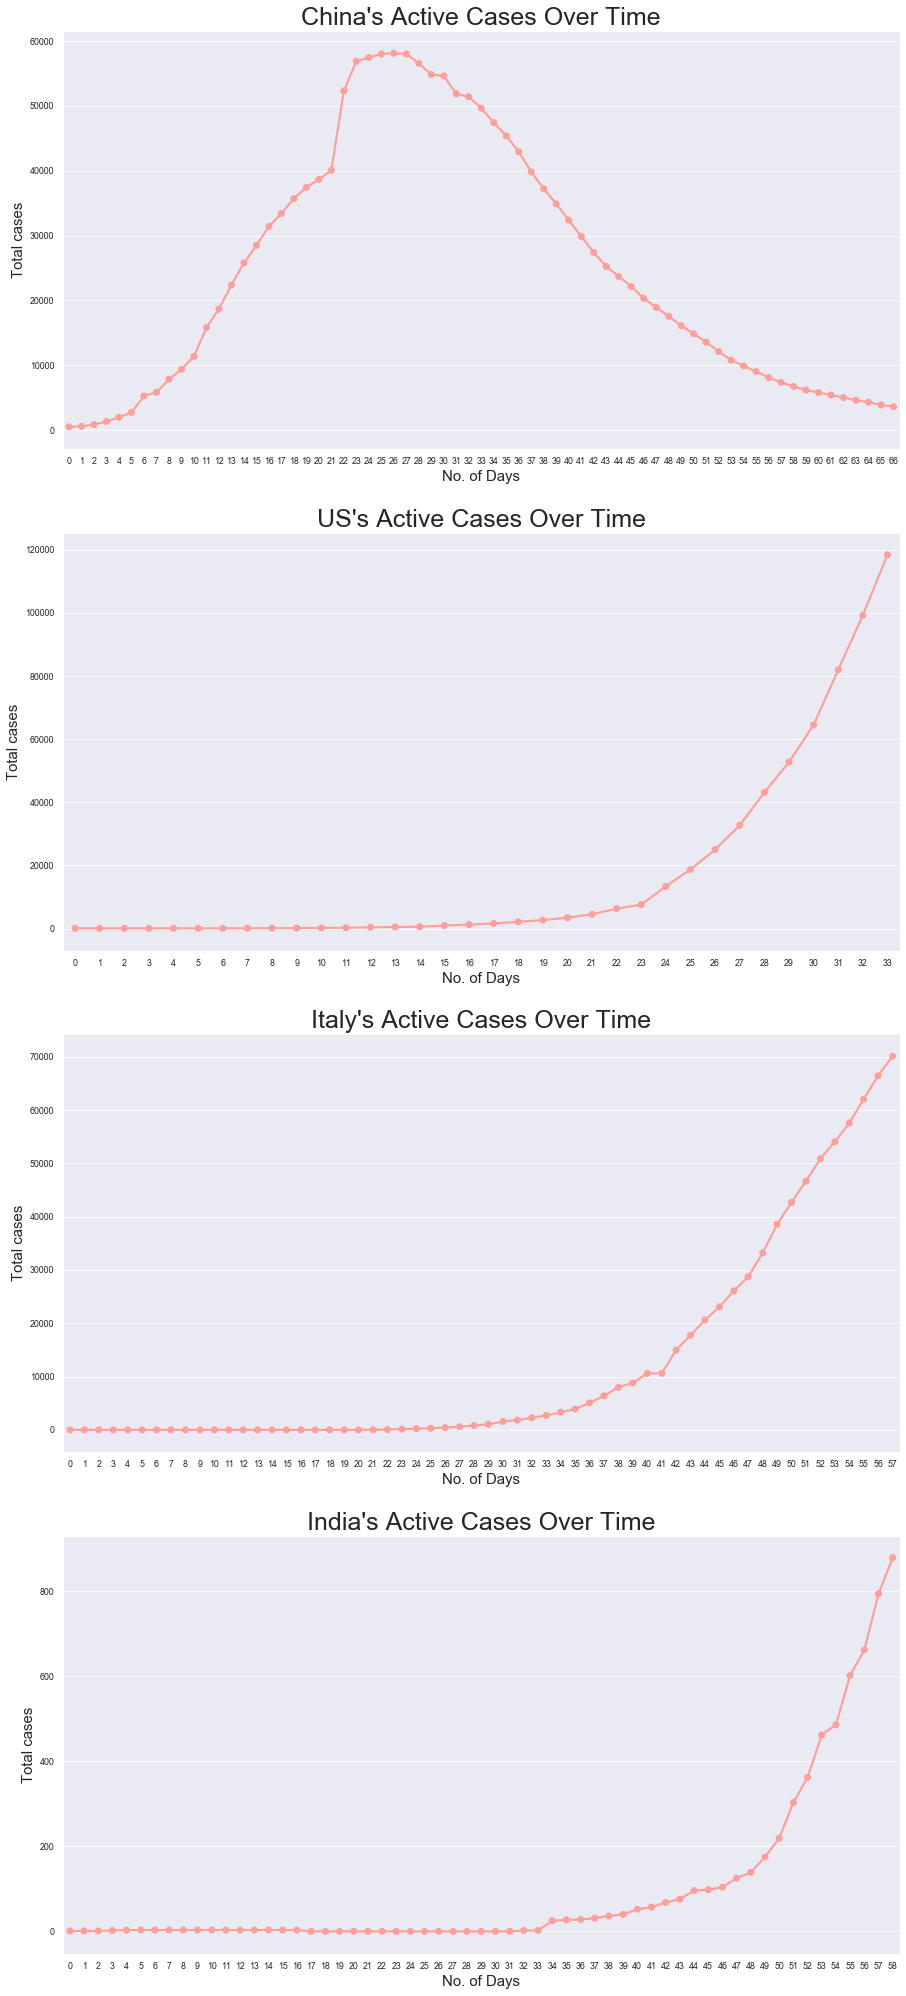

In [33]:
plt.figure(figsize=(15,30))
plt.subplot(4, 1, 1)
sns.pointplot(china.index ,china.active, color = 'r')
plt.title("China's Active Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 2)
sns.pointplot(us.index ,us.active, color = 'r')
plt.title("US's Active Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 3)
sns.pointplot(italy.index ,italy.active, color = 'r')
plt.title("Italy's Active Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 4)
sns.pointplot(india.index ,india.active, color = 'r')
plt.title("India's Active Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplots_adjust(bottom=0.01, top=0.9)

##### Here are my observations:
##### 1) It's showing the same insights as to the confirmed cases
##### 2) But the only difference is the no.of active cases in China has been incrementally decreasing from day 30 as there a few deaths and a lot of recovered people and they have also prevented the spread of the covid-19 virus. 
##### 3) The no. of active cases in the US and Italy is rising detrimentally.
##### 4) Even though the slope of India is high but the rate of increase is less.

## Comparision on no. of death cases till date:

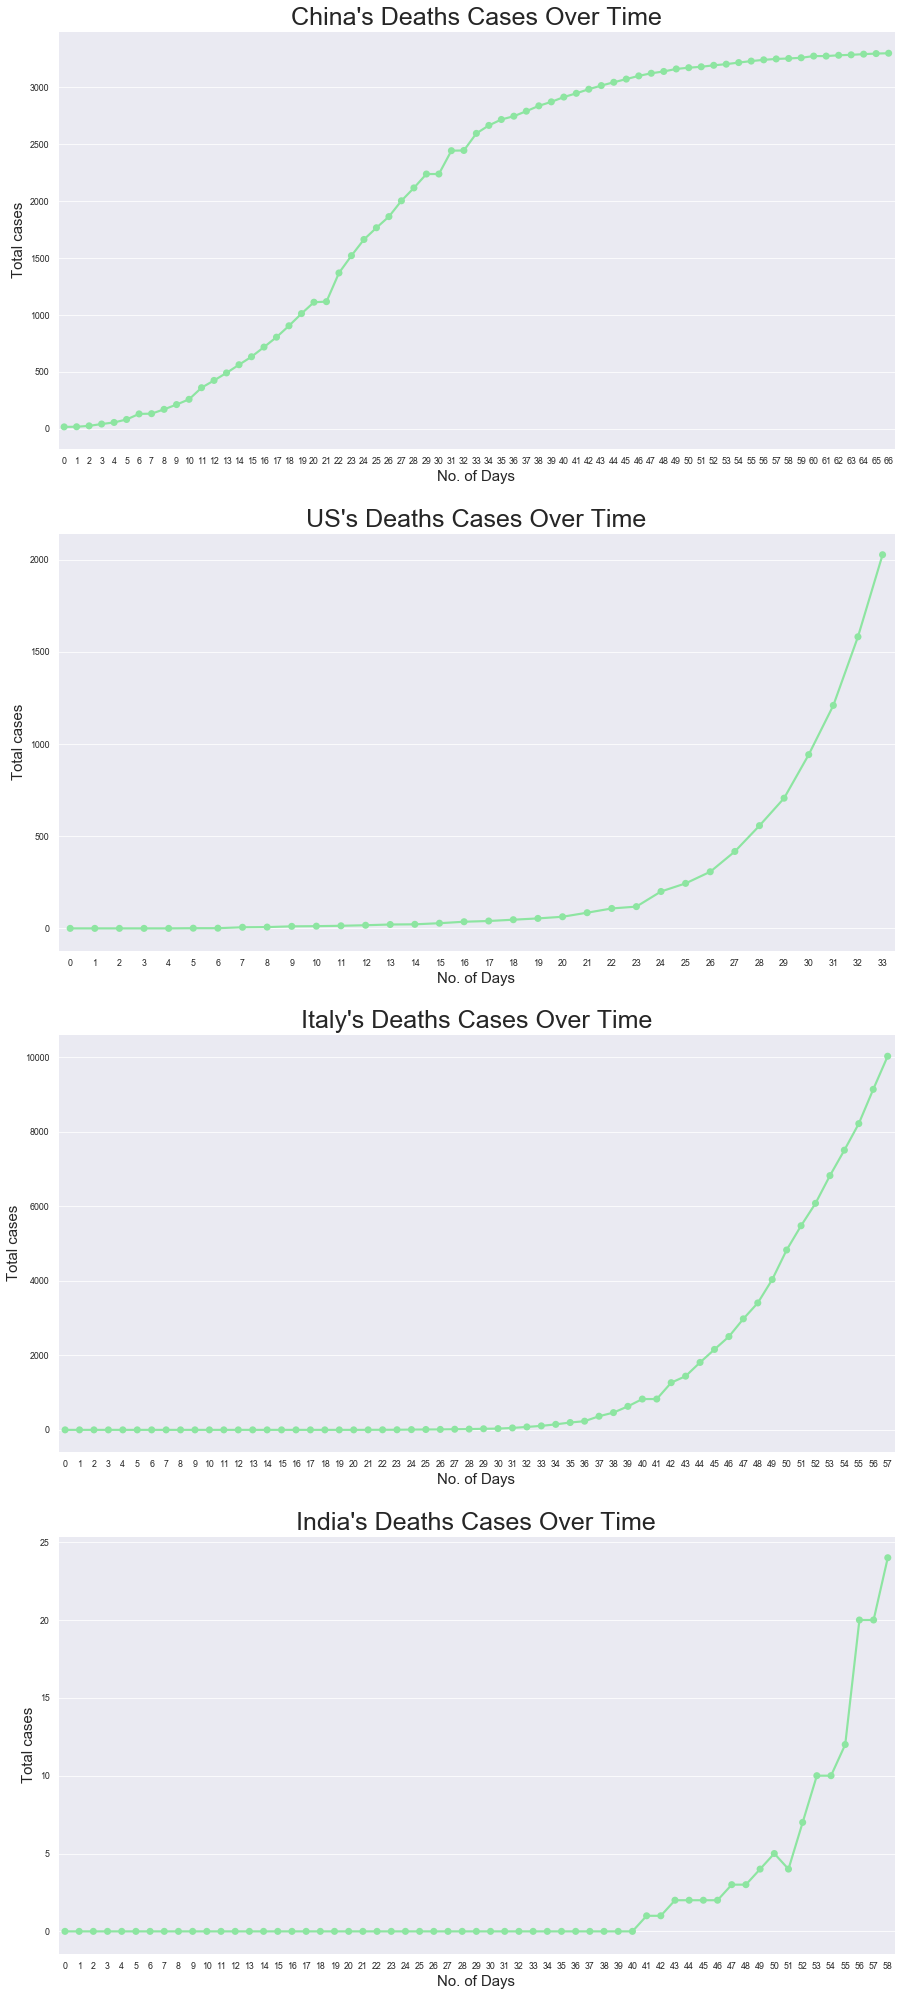

In [34]:
plt.figure(figsize=(15,30))
plt.subplot(4, 1, 1)
sns.pointplot(china.index ,china.deaths, color = 'g')
plt.title("China's Deaths Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 2)
sns.pointplot(us.index ,us.deaths, color = 'g')
plt.title("US's Deaths Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 3)
sns.pointplot(italy.index ,italy.deaths, color = 'g')
plt.title("Italy's Deaths Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 4)
sns.pointplot(india.index ,india.deaths, color = 'g')
plt.title("India's Deaths Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplots_adjust(bottom=0.01, top=0.9)

##### Here are my observations:
##### 1) Even though China was the first to get the virus, they were able to minimize the no. of deaths considerably after Day 30.
##### 2) But lately there has been a huge surge in no. of deaths in Italy and it has also crossed the most no. of deaths in the world.
##### 3) There is also a slight increase in no. of deaths in the US.
##### 4) India on the other hand considerably have very less no. of deaths.

## Comparision on no. of recovered cases till date:

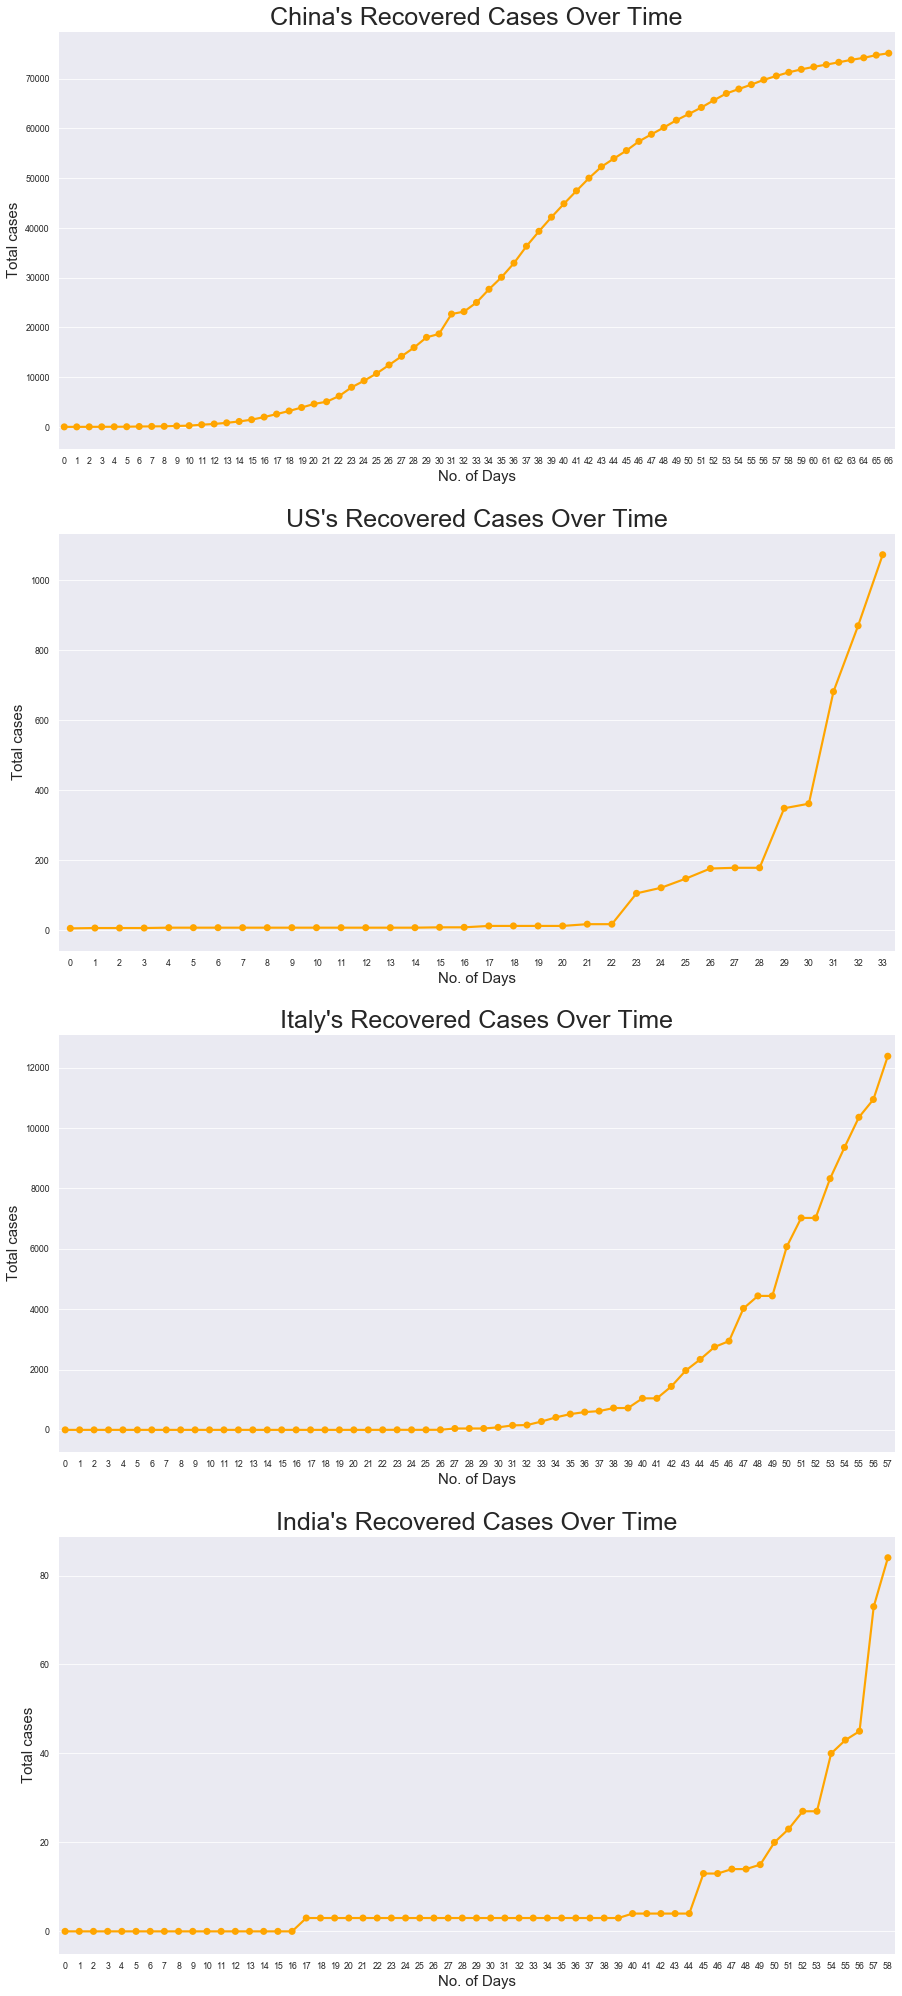

In [35]:
plt.figure(figsize=(15,30))
plt.subplot(4, 1, 1)
sns.pointplot(china.index ,china.recovered, color = 'orange')
plt.title("China's Recovered Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 2)
sns.pointplot(us.index ,us.recovered, color = 'orange')
plt.title("US's Recovered Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 3)
sns.pointplot(italy.index ,italy.recovered, color = 'orange')
plt.title("Italy's Recovered Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 4)
sns.pointplot(india.index ,india.recovered, color = 'orange')
plt.title("India's Recovered Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplots_adjust(bottom=0.01, top=0.9)

##### Here are my observations:
##### 1) Compared to the number of confirmed cases, China has done an incredible job in recovering so many patients from the covid-19 pandemic.
##### 2) Italy is also trying to increase the number of recoveries, but lately the number of deaths has gone through the roof.
##### 3) Recoveries of the US and India are also less. 

## Using Deep Learning to Predict

In [36]:
# review data one more time
df.head()

state      country      lat     long       date  confirmed  deaths  \
0   NaN  Afghanistan  33.0000  65.0000 2020-01-22          0       0   
1   NaN      Albania  41.1533  20.1683 2020-01-22          0       0   
2   NaN      Algeria  28.0339   1.6596 2020-01-22          0       0   
3   NaN      Andorra  42.5063   1.5218 2020-01-22          0       0   
4   NaN       Angola -11.2027  17.8739 2020-01-22          0       0   

   recovered  active  
0          0       0  
1          0       0  
2          0       0  
3          0       0  
4          0       0

In [37]:
# drop some columns to keep data for deep learning only
df1 = df.drop(columns=['state', 'lat', 'long'])
df1.head()

country       date  confirmed  deaths  recovered  active
0  Afghanistan 2020-01-22          0       0          0       0
1      Albania 2020-01-22          0       0          0       0
2      Algeria 2020-01-22          0       0          0       0
3      Andorra 2020-01-22          0       0          0       0
4       Angola 2020-01-22          0       0          0       0

In [38]:
df1

country       date  confirmed  deaths  \
0                           Afghanistan 2020-01-22          0       0   
1                               Albania 2020-01-22          0       0   
2                               Algeria 2020-01-22          0       0   
3                               Andorra 2020-01-22          0       0   
4                                Angola 2020-01-22          0       0   
5                   Antigua and Barbuda 2020-01-22          0       0   
6                             Argentina 2020-01-22          0       0   
7                               Armenia 2020-01-22          0       0   
8                             Australia 2020-01-22          0       0   
9                             Australia 2020-01-22          0       0   
10                            Australia 2020-01-22          0       0   
11                            Australia 2020-01-22          0       0   
12                            Australia 2020-01-22          0       0   
13                            Australia 2020-01-22          0       0   
14                            Australia 2020-01-22          0       0   
15                            Australia 2020-01-22          0       0   
16                              Austria 2020-01-22          0       0   
17                           Azerbaijan 2020-01-22          0       0   
18                              Bahamas 2020-01-22          0       0   
19                              Bahrain 2020-01-22          0       0   
20                           Bangladesh 2020-01-22          0       0   
21                             Barbados 2020-01-22          0       0   
22                              Belarus 2020-01-22          0       0   
23                              Belgium 2020-01-22          0       0   
24                                Benin 2020-01-22          0       0   
25                               Bhutan 2020-01-22          0       0   
26                              Bolivia 2020-01-22          0       0   
27               Bosnia and Herzegovina 2020-01-22          0       0   
28                               Brazil 2020-01-22          0       0   
29                               Brunei 2020-01-22          0       0   
30                             Bulgaria 2020-01-22          0       0   
31                         Burkina Faso 2020-01-22          0       0   
32                           Cabo Verde 2020-01-22          0       0   
33                             Cambodia 2020-01-22          0       0   
34                             Cameroon 2020-01-22          0       0   
35                               Canada 2020-01-22          0       0   
36                               Canada 2020-01-22          0       0   
37                               Canada 2020-01-22          0       0   
38                               Canada 2020-01-22          0       0   
39                               Canada 2020-01-22          0       0   
40                               Canada 2020-01-22          0       0   
41                               Canada 2020-01-22          0       0   
42                               Canada 2020-01-22          0       0   
43                               Canada 2020-01-22          0       0   
44                               Canada 2020-01-22          0       0   
45                               Canada 2020-01-22          0       0   
46             Central African Republic 2020-01-22          0       0   
47                                 Chad 2020-01-22          0       0   
48                                Chile 2020-01-22          0       0   
49                                China 2020-01-22          1       0   
50                                China 2020-01-22         14       0   
51                                China 2020-01-22          6       0   
52                                China 2020-01-22          1       0   
53                                China 2020-01-22          0       0   
54               

In [39]:
# US data
df_us = df1[df1['country']=='US']
df_us.head()

country       date  confirmed  deaths  recovered  active
225       US 2020-01-22          1       0          0       1
477       US 2020-01-23          1       0          0       1
729       US 2020-01-24          2       0          0       2
981       US 2020-01-25          2       0          0       2
1233      US 2020-01-26          5       0          0       5

In [40]:
# prepare timeseries data
df_us = df_us.drop(columns=['country'])

# sort date
df_us = df_us.sort_values(['date'])

df_us

date  confirmed  deaths  recovered  active
225   2020-01-22          1       0          0       1
477   2020-01-23          1       0          0       1
729   2020-01-24          2       0          0       2
981   2020-01-25          2       0          0       2
1233  2020-01-26          5       0          0       5
1485  2020-01-27          5       0          0       5
1737  2020-01-28          5       0          0       5
1989  2020-01-29          5       0          0       5
2241  2020-01-30          5       0          0       5
2493  2020-01-31          7       0          0       7
2745  2020-02-01          8       0          0       8
2997  2020-02-02          8       0          0       8
3249  2020-02-03         11       0          0      11
3501  2020-02-04         11       0          0      11
3753  2020-02-05         11       0          0      11
4005  2020-02-06         11       0          0      11
4257  2020-02-07         11       0          0      11
4509  2020-02-08         11       0          0      11
4761  2020-02-09         11       0          3       8
5013  2020-02-10         11       0          3       8
5265  2020-02-11         12       0          3       9
5517  2020-02-12         12       0          3       9
5769  2020-02-13         13       0          3      10
6021  2020-02-14         13       0          3      10
6273  2020-02-15         13       0          3      10
6525  2020-02-16         13       0          3      10
6777  2020-02-17         13       0          3      10
7029  2020-02-18         13       0          3      10
7281  2020-02-19         13       0          3      10
7533  2020-02-20         13       0          3      10
7785  2020-02-21         15       0          5      10
8037  2020-02-22         15       0          5      10
8289  2020-02-23         15       0          5      10
8541  2020-02-24         51       0          5      46
8793  2020-02-25         51       0          6      45
9045  2020-02-26         57       0          6      51
9297  2020-02-27         58       0          6      52
9549  2020-02-28         60       0          7      53
9801  2020-02-29         68       1          7      60
10053 2020-03-01         74       1          7      66
10305 2020-03-02         98       6          7      85
10557 2020-03-03        118       7          7     104
10809 2020-03-04        149      11          7     131
11061 2020-03-05        217      12          7     198
11313 2020-03-06        262      14          7     241
11565 2020-03-07        402      17          7     378
11817 2020-03-08        518      21          7     490
12069 2020-03-09        583      22          7     554
12321 2020-03-10        959      28          8     923
12573 2020-03-11       1281      36          8    1237
12825 2020-03-12       1663      40         12    1611
13077 2020-03-13       2179      47         12    2120
13329 2020-03-14       2727      54         12    2661
13581 2020-03-15       3499      63         12    3424
13833 2020-03-16       4632      85         17    4530
14085 2020-03-17       6421     108         17    6296
14337 2020-03-18       7783     118        105    7560
14589 2020-03-19      13677     200        121   13356
14841 2020-03-20      19100     244        147   18709
15093 2020-03-21      25489     307        176   25006
15345 2020-03-22      33276     417        178   32681
15597 2020-03-23      43847     557        178   43112
15849 2020-03-24      53740     706        348   52686
16101 2020-03-25      65778     942        361   64475
16353 2020-03-26      83836    1209        681   81946
16605 2020-03-27     101657    1581        869   99207
16857 2020-03-28     121478    2026       1072  118380

In [41]:
len(df_us)

67

In [42]:
# set date column as index
df_us = df_us.set_index('date')
df_us

confirmed  deaths  recovered  active
date                                            
2020-01-22          1       0          0       1
2020-01-23          1       0          0       1
2020-01-24          2       0          0       2
2020-01-25          2       0          0       2
2020-01-26          5       0          0       5
2020-01-27          5       0          0       5
2020-01-28          5       0          0       5
2020-01-29          5       0          0       5
2020-01-30          5       0          0       5
2020-01-31          7       0          0       7
2020-02-01          8       0          0       8
2020-02-02          8       0          0       8
2020-02-03         11       0          0      11
2020-02-04         11       0          0      11
2020-02-05         11       0          0      11
2020-02-06         11       0          0      11
2020-02-07         11       0          0      11
2020-02-08         11       0          0      11
2020-02-09         11       0          3       8
2020-02-10         11       0          3       8
2020-02-11         12       0          3       9
2020-02-12         12       0          3       9
2020-02-13         13       0          3      10
2020-02-14         13       0          3      10
2020-02-15         13       0          3      10
2020-02-16         13       0          3      10
2020-02-17         13       0          3      10
2020-02-18         13       0          3      10
2020-02-19         13       0          3      10
2020-02-20         13       0          3      10
2020-02-21         15       0          5      10
2020-02-22         15       0          5      10
2020-02-23         15       0          5      10
2020-02-24         51       0          5      46
2020-02-25         51       0          6      45
2020-02-26         57       0          6      51
2020-02-27         58       0          6      52
2020-02-28         60       0          7      53
2020-02-29         68       1          7      60
2020-03-01         74       1          7      66
2020-03-02         98       6          7      85
2020-03-03        118       7          7     104
2020-03-04        149      11          7     131
2020-03-05        217      12          7     198
2020-03-06        262      14          7     241
2020-03-07        402      17          7     378
2020-03-08        518      21          7     490
2020-03-09        583      22          7     554
2020-03-10        959      28          8     923
2020-03-11       1281      36          8    1237
2020-03-12       1663      40         12    1611
2020-03-13       2179      47         12    2120
2020-03-14       2727      54         12    2661
2020-03-15       3499      63         12    3424
2020-03-16       4632      85         17    4530
2020-03-17       6421     108         17    6296
2020-03-18       7783     118        105    7560
2020-03-19      13677     200        121   13356
2020-03-20      19100     244        147   18709
2020-03-21      25489     307        176   25006
2020-03-22      33276     417        178   32681
2020-03-23      43847     557        178   43112
2020-03-24      53740     706        348   52686
2020-03-25      65778     942        361   64475
2020-03-26      83836    1209        681   81946
2020-03-27     101657    1581        869   99207
2020-03-28     121478    2026       1072  118380

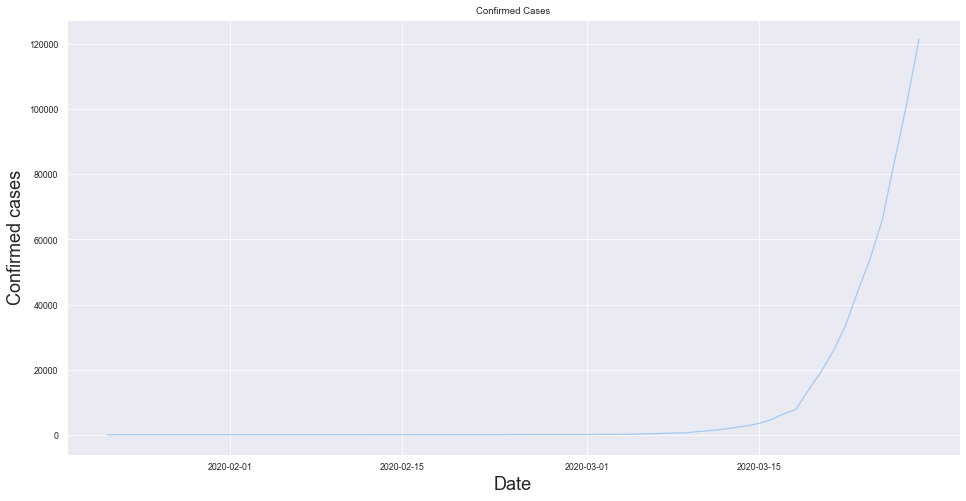

In [43]:
# visualize the confirmed cases
plt.figure(figsize=(16,8))
plt.title('Confirmed Cases')
plt.plot(df_us['confirmed'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Confirmed cases', fontsize=18)
plt.show()

In [44]:
# Create a new dataframe with only the confirmed column
data = df_us.filter(['confirmed'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

54

In [45]:
# view dataset
dataset

array([[     1],
       [     1],
       [     2],
       [     2],
       [     5],
       [     5],
       [     5],
       [     5],
       [     5],
       [     7],
       [     8],
       [     8],
       [    11],
       [    11],
       [    11],
       [    11],
       [    11],
       [    11],
       [    11],
       [    11],
       [    12],
       [    12],
       [    13],
       [    13],
       [    13],
       [    13],
       [    13],
       [    13],
       [    13],
       [    13],
       [    15],
       [    15],
       [    15],
       [    51],
       [    51],
       [    57],
       [    58],
       [    60],
       [    68],
       [    74],
       [    98],
       [   118],
       [   149],
       [   217],
       [   262],
       [   402],
       [   518],
       [   583],
       [   959],
       [  1281],
       [  1663],
       [  2179],
       [  2727],
       [  3499],
       [  4632],
       [  6421],
       [  7783],
       [ 13677],
       [ 19100

In [46]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00000000e+00],
       [0.00000000e+00],
       [8.23201100e-06],
       [8.23201100e-06],
       [3.29280440e-05],
       [3.29280440e-05],
       [3.29280440e-05],
       [3.29280440e-05],
       [3.29280440e-05],
       [4.93920660e-05],
       [5.76240770e-05],
       [5.76240770e-05],
       [8.23201100e-05],
       [8.23201100e-05],
       [8.23201100e-05],
       [8.23201100e-05],
       [8.23201100e-05],
       [8.23201100e-05],
       [8.23201100e-05],
       [8.23201100e-05],
       [9.05521210e-05],
       [9.05521210e-05],
       [9.87841320e-05],
       [9.87841320e-05],
       [9.87841320e-05],
       [9.87841320e-05],
       [9.87841320e-05],
       [9.87841320e-05],
       [9.87841320e-05],
       [9.87841320e-05],
       [1.15248154e-04],
       [1.15248154e-04],
       [1.15248154e-04],
       [4.11600550e-04],
       [4.11600550e-04],
       [4.60992616e-04],
       [4.69224627e-04],
       [4.85688649e-04],
       [5.51544737e-04],
       [6.00936803e-04],


In [47]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []



In [48]:
range(60, len(train_data))

range(60, 54)

In [49]:
chunk_size=30
for i in range(chunk_size, len(train_data)):
    x_train.append(train_data[i-chunk_size:i, 0])
    y_train.append(train_data[i, 0])

In [50]:
print(x_train)
print(y_train)

[array([0.0000000e+00, 0.0000000e+00, 8.2320110e-06, 8.2320110e-06,
       3.2928044e-05, 3.2928044e-05, 3.2928044e-05, 3.2928044e-05,
       3.2928044e-05, 4.9392066e-05, 5.7624077e-05, 5.7624077e-05,
       8.2320110e-05, 8.2320110e-05, 8.2320110e-05, 8.2320110e-05,
       8.2320110e-05, 8.2320110e-05, 8.2320110e-05, 8.2320110e-05,
       9.0552121e-05, 9.0552121e-05, 9.8784132e-05, 9.8784132e-05,
       9.8784132e-05, 9.8784132e-05, 9.8784132e-05, 9.8784132e-05,
       9.8784132e-05, 9.8784132e-05]), array([0.00000000e+00, 8.23201100e-06, 8.23201100e-06, 3.29280440e-05,
       3.29280440e-05, 3.29280440e-05, 3.29280440e-05, 3.29280440e-05,
       4.93920660e-05, 5.76240770e-05, 5.76240770e-05, 8.23201100e-05,
       8.23201100e-05, 8.23201100e-05, 8.23201100e-05, 8.23201100e-05,
       8.23201100e-05, 8.23201100e-05, 8.23201100e-05, 9.05521210e-05,
       9.05521210e-05, 9.87841320e-05, 9.87841320e-05, 9.87841320e-05,
       9.87841320e-05, 9.87841320e-05, 9.87841320e-05, 9.87841320

In [51]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [52]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(24, 30, 1)

In [53]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

ModuleNotFoundError: No module named 'keras'

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

In [ ]:
# Create the testing data set
chunk_size=30
test_data = scaled_data[training_data_len - chunk_size:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(chunk_size, len(test_data)):
    x_test.append(test_data[i-chunk_size:i, 0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Plot the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Prediction v.s. Test')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Confirmed Cases', fontsize=18)
plt.plot(train['confirmed'])
plt.plot(test[['confirmed', 'predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()